In [ ]:
# https://www.topdowncharts.com/post/2018/05/12/8-free-macro-and-market-data-sources

In [1]:
import pandas as pd
import json
import requests

# FRED


In [ ]:
# https://stackoverflow.com/questions/34768206/fred-economic-series-ids
# https://fred.stlouisfed.org/docs/api/fred/category_series.html#api_key


# YFinance - Yahoo Finance

In [44]:
! pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=921770deb8c9c58ad86f6e8400b9859721c8b16c956b1cef7997b641e89b261f
  Stored in directory: /Users/philipwahlstrom/Library/Caches/pip/wheels/f2/b5/2c/59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


In [157]:
import yfinance as yf

In [17]:
# https://towardsdev.com/fred-api-get-us-economic-data-using-python-e51ac8e7b1cc

In [18]:
# https://analyzingalpha.com/fred-api-python/

In [ ]:
# https://stackoverflow.com/questions/34768206/fred-economic-series-ids

# API-module for St.Louis FED (FRED) 
## full-fred

In [ ]:
# https://github.com/7astro7/full_fred

In [6]:
pip install full-fred

     |████████████████████████████████| 47 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pytest as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 

### Initiate full-fred

In [3]:
from full_fred.fred import Fred

In [4]:
fred = Fred('FRED API key.txt')

In [5]:
fred.get_api_key_file()

'FRED API key.txt'

In [6]:
fred.set_api_key_file('FRED API key.txt')

True

### My functions:

In [35]:
def clean_df(df):
    # Drop unwanted columns:
    df.drop(['realtime_start', 'realtime_end'], axis=1, inplace=True)
    # Make date into datetime, and set as index:
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    # Remove "." in data
    miss_inx = df.loc[df.values == "."].index
    df.drop(index=miss_inx, inplace=True)
    
    # Set 'value' to float:
    df['value'] = df['value'].astype(float)
    return df

In [15]:
fig, ax1 = plt.subplots()
ax1.plot(df_CPI)
ax2 = ax1.twinx()
ax2.plot(df_EURUSD2)

## Getting data from full-fred

#### FRED EUR-interest rates:

In [ ]:
https://fred.stlouisfed.org/tags/series?t=euro+area%3Binterest+rate

In [ ]:
# Example 1: Get EURUSD from FRED (as a DataFrame), clean it into a proper time-series:

In [38]:
df_EURUSD = fred.get_series_df('DEXUSEU')

In [39]:
df_EURUSD

,realtime_start,realtime_end,date,value
0,2022-04-25,2022-04-25,1999-01-04,1.1812
1,2022-04-25,2022-04-25,1999-01-05,1.1760
2,2022-04-25,2022-04-25,1999-01-06,1.1636
3,2022-04-25,2022-04-25,1999-01-07,1.1672
4,2022-04-25,2022-04-25,1999-01-08,1.1554
...,...,...,...,...
6070,2022-04-25,2022-04-25,2022-04-11,1.0875
6071,2022-04-25,2022-04-25,2022-04-12,1.0852
6072,2022-04-25,2022-04-25,2022-04-13,1.0874
6073,2022-04-25,2022-04-25,2022-04-14,1.0796


In [40]:
df_EURUSD = clean_df(df_EURUSD)

In [41]:
df_EURUSD

,value
date,
1999-01-04,1.1812
1999-01-05,1.1760
1999-01-06,1.1636
1999-01-07,1.1672
1999-01-08,1.1554
...,...
2022-04-11,1.0875
2022-04-12,1.0852
2022-04-13,1.0874


<AxesSubplot:xlabel='date'>

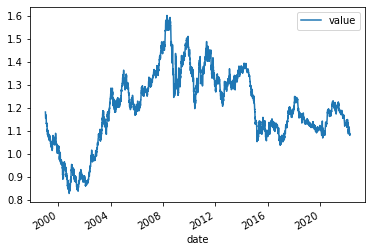

In [42]:
df_EURUSD.plot()

In [43]:
# Example 2: I can also get another time-series, clean it, and plot it against EURUSD on separate y-axis:
df_US_IR = fred.get_series_df('DGS10')
df_US_IR = clean_df(df_US_IR)

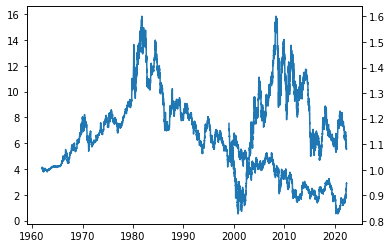

In [46]:
fig, ax1 = plt.subplots()
ax1.plot(df_US_IR)
ax2 = ax1.twinx()
ax2.plot(df_EURUSD)

In [ ]:
# Example 3: Get EUR-interest rates, combine them with US-interest rates into one DataFrame, and...

In [54]:
df_EUR_IR = fred.get_series_df('INTGSBEZM193N')
df_EUR_IR = clean_df(df_EUR_IR)

In [55]:
# Merge
df_new = df_US_IR.merge(df_EUR_IR, how='outer', on='date', sort=True)

# Rename column-headers
new_col = {'value_x': 'US_IR', 'value_y':'EUR_IR'}
df_new.rename(columns=new_col, inplace=True)

In [61]:
df_new

,US_IR,EUR_IR
date,,
1962-01-02,4.06,NaN
1962-01-03,4.03,NaN
1962-01-04,3.99,NaN
1962-01-05,4.02,NaN
1962-01-08,4.03,NaN
...,...,...
2022-04-14,2.83,NaN
2022-04-18,2.85,NaN
2022-04-19,2.93,NaN


In [69]:
df_EUR_IR

,value
date,
1970-01-01,7.7526
1970-02-01,7.9037
1970-03-01,8.1123
1970-04-01,8.0727
1970-05-01,8.2432
...,...
2017-01-01,1.3139
2017-02-01,1.4452
2017-03-01,1.4599


In [70]:
df_US_IR

,value
date,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2022-04-14,2.83
2022-04-18,2.85
2022-04-19,2.93


In [75]:
df_EUR_IR.dypes

AttributeError: 'DataFrame' object has no attribute 'dypes'

In [ ]:
df.plot(x="Name", y=["Price", "User Rating"], kind="bar", figsize=(9, 8))





<AxesSubplot:xlabel='date'>

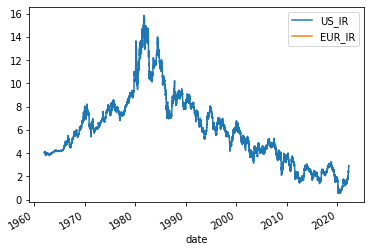

In [60]:
df_new.plot(y=["US_IR", "EUR_IR"], kind="line")

In [21]:
df_CPI = fred.get_series_df('FPCPITOTLZGUSA')

In [34]:
fred.get_child_categories(0)

{'categories': [{'id': 32991,
   'name': 'Money, Banking, & Finance',
   'parent_id': 0},
  {'id': 10,
   'name': 'Population, Employment, & Labor Markets',
   'parent_id': 0},
  {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
  {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
  {'id': 32455, 'name': 'Prices', 'parent_id': 0},
  {'id': 32263, 'name': 'International Data', 'parent_id': 0},
  {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
  {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]}

In [35]:
fred.category_stack['get_child_categories']

{'categories': [{'id': 32991,
   'name': 'Money, Banking, & Finance',
   'parent_id': 0},
  {'id': 10,
   'name': 'Population, Employment, & Labor Markets',
   'parent_id': 0},
  {'id': 32992, 'name': 'National Accounts', 'parent_id': 0},
  {'id': 1, 'name': 'Production & Business Activity', 'parent_id': 0},
  {'id': 32455, 'name': 'Prices', 'parent_id': 0},
  {'id': 32263, 'name': 'International Data', 'parent_id': 0},
  {'id': 3008, 'name': 'U.S. Regional Data', 'parent_id': 0},
  {'id': 33060, 'name': 'Academic Data', 'parent_id': 0}]}

In [36]:
fred.get_child_categories(32455)

{'categories': [{'id': 32217, 'name': 'Commodities', 'parent_id': 32455},
  {'id': 9,
   'name': 'Consumer Price Indexes (CPI and PCE)',
   'parent_id': 32455},
  {'id': 33913, 'name': 'Cryptocurrencies', 'parent_id': 32455},
  {'id': 4, 'name': 'Employment Cost Index', 'parent_id': 32455},
  {'id': 33717, 'name': 'Health Care Indexes', 'parent_id': 32455},
  {'id': 32261, 'name': 'House Price Indexes', 'parent_id': 32455},
  {'id': 31, 'name': 'Producer Price Indexes (PPI)', 'parent_id': 32455},
  {'id': 32220, 'name': 'Trade Indexes', 'parent_id': 32455}]}

In [37]:
fred.get_child_categories(9)

{'categories': [{'id': 32415, 'name': 'Food and Beverages', 'parent_id': 9},
  {'id': 32416, 'name': 'Housing', 'parent_id': 9},
  {'id': 32417, 'name': 'Apparel', 'parent_id': 9},
  {'id': 32418, 'name': 'Transportation', 'parent_id': 9},
  {'id': 32419, 'name': 'Medical Care', 'parent_id': 9},
  {'id': 32420, 'name': 'Recreation', 'parent_id': 9},
  {'id': 32421, 'name': 'Education and Communication', 'parent_id': 9},
  {'id': 32422, 'name': 'Other Goods and Services', 'parent_id': 9},
  {'id': 32423, 'name': 'Commodity and Services Groups', 'parent_id': 9},
  {'id': 32424, 'name': 'Special Indexes', 'parent_id': 9}]}